The trial of LibJ barcode virus infecting CD4 T cells, with the presence of DRV.  
I sampled cells every 12 hours.  
Integration sites and alternative splicing are sequenced at the same time, both with valid UMI.

In [36]:
import pandas as pd
import numpy as np
from scipy import stats as ss
from matplotlib import pyplot as plt

## Integration sites linkage sequencing quality controls

In [37]:
hdatadict = {}
for time in range(12,132,12):
    hdatadict[time] = pd.read_csv('ISS_linkage/linkage_'+str(time)+'h.txt',sep='\t',names=['UMI','UMI_count','barcode','barcode_freq','second_bc_freq','site_type','site_annot','site_freq','second_site_freq'])
hdata = pd.concat(hdatadict)
hdata

UMI  UMI_count                      barcode  barcode_freq  \
12  0       GATGACATGG          1  CTTATAGCAGTAGAAGTCGAAGTTGGG           1.0   
    1       ATAAATCACT          1  CTTATAGCTGGTGATGTTGAGGTAGTT           1.0   
    2       CCCAGCACAA          1  CTTATAGGCGCTGAAGAGGCTGAAGTT           1.0   
    3       TTATTTATTC          1  CTTATAGGAGACGGTGAAGTAGTTGTT           1.0   
    4       TGTTTCCACA          1  CTTATAGGCGACGGAGATGCTGTAGGT           1.0   
...                ...        ...                          ...           ...   
120 234240  TCGTCATGGC          1  CTTATAGCAGACGACGAATTCGAAGGA           1.0   
    234241  GGTGTGGCGC          1  CTTATAGAGGTTGTGGCAGCAGACGCA           1.0   
    234242  TTAGCTGGGG          2  CTTATAGCAGATGTTGTAGAGGGGGAT           0.5   
    234243  GGTGTGGCGA          1  CTTATAGATGTGGTTGATGGAGGCGGC           1.0   
    234244  ACACAAGGGT          1  CTTATAGCTGATGAAGCAGAAGCCGCA           1.0   

            second_bc_freq site_type  \
12  0                  NaN      hg19   
    1                  NaN   plasmid   
    2                  NaN      free   
    3                  NaN      hg19   
    4                  NaN   plasmid   
...                    ...       ...   
120 234240             NaN   plasmid   
    234241             NaN      free   
    234242             0.5      free   
    234243             NaN      hg19   
    234244             NaN      free   

                                                   site_annot  site_freq  \
12  0                                         chr2:33141553:-        1.0   
    1       CCCAGGAGGTAGAGGTTGCAGTGAGCCAAGATCGCGCCACTGCATT...        1.0   
    2                                                  CCCAGG        1.0   
    3                                         chr2:33141650:-        1.0   
    4       CCCAGGAGGTAGAGGTTGCAGTGAGCCAAGATCGCGCCACTGCATT...        1.0   
...                                                       ...        ...   
120 234240  CCCAGGAGGTAGAGGTTGCAGTGAGCCAAGATCGCGCCACTGCATT...        1.0   
    234241                                                  G        1.0   
    234242                                                  G        1.0   
    234243                                     chr3:6977617:+        1.0   
    234244                                                 GT        1.0   

            second_site_freq  
12  0                    NaN  
    1                    NaN  
    2                    NaN  
    3                    NaN  
    4                    NaN  
...                      ...  
120 234240               NaN  
    234241               NaN  
    234242               NaN  
    234243               NaN  
    234244               NaN  

[3104249 rows x 9 columns]

In [38]:
hdata['time']=hdata.index.get_level_values(0)

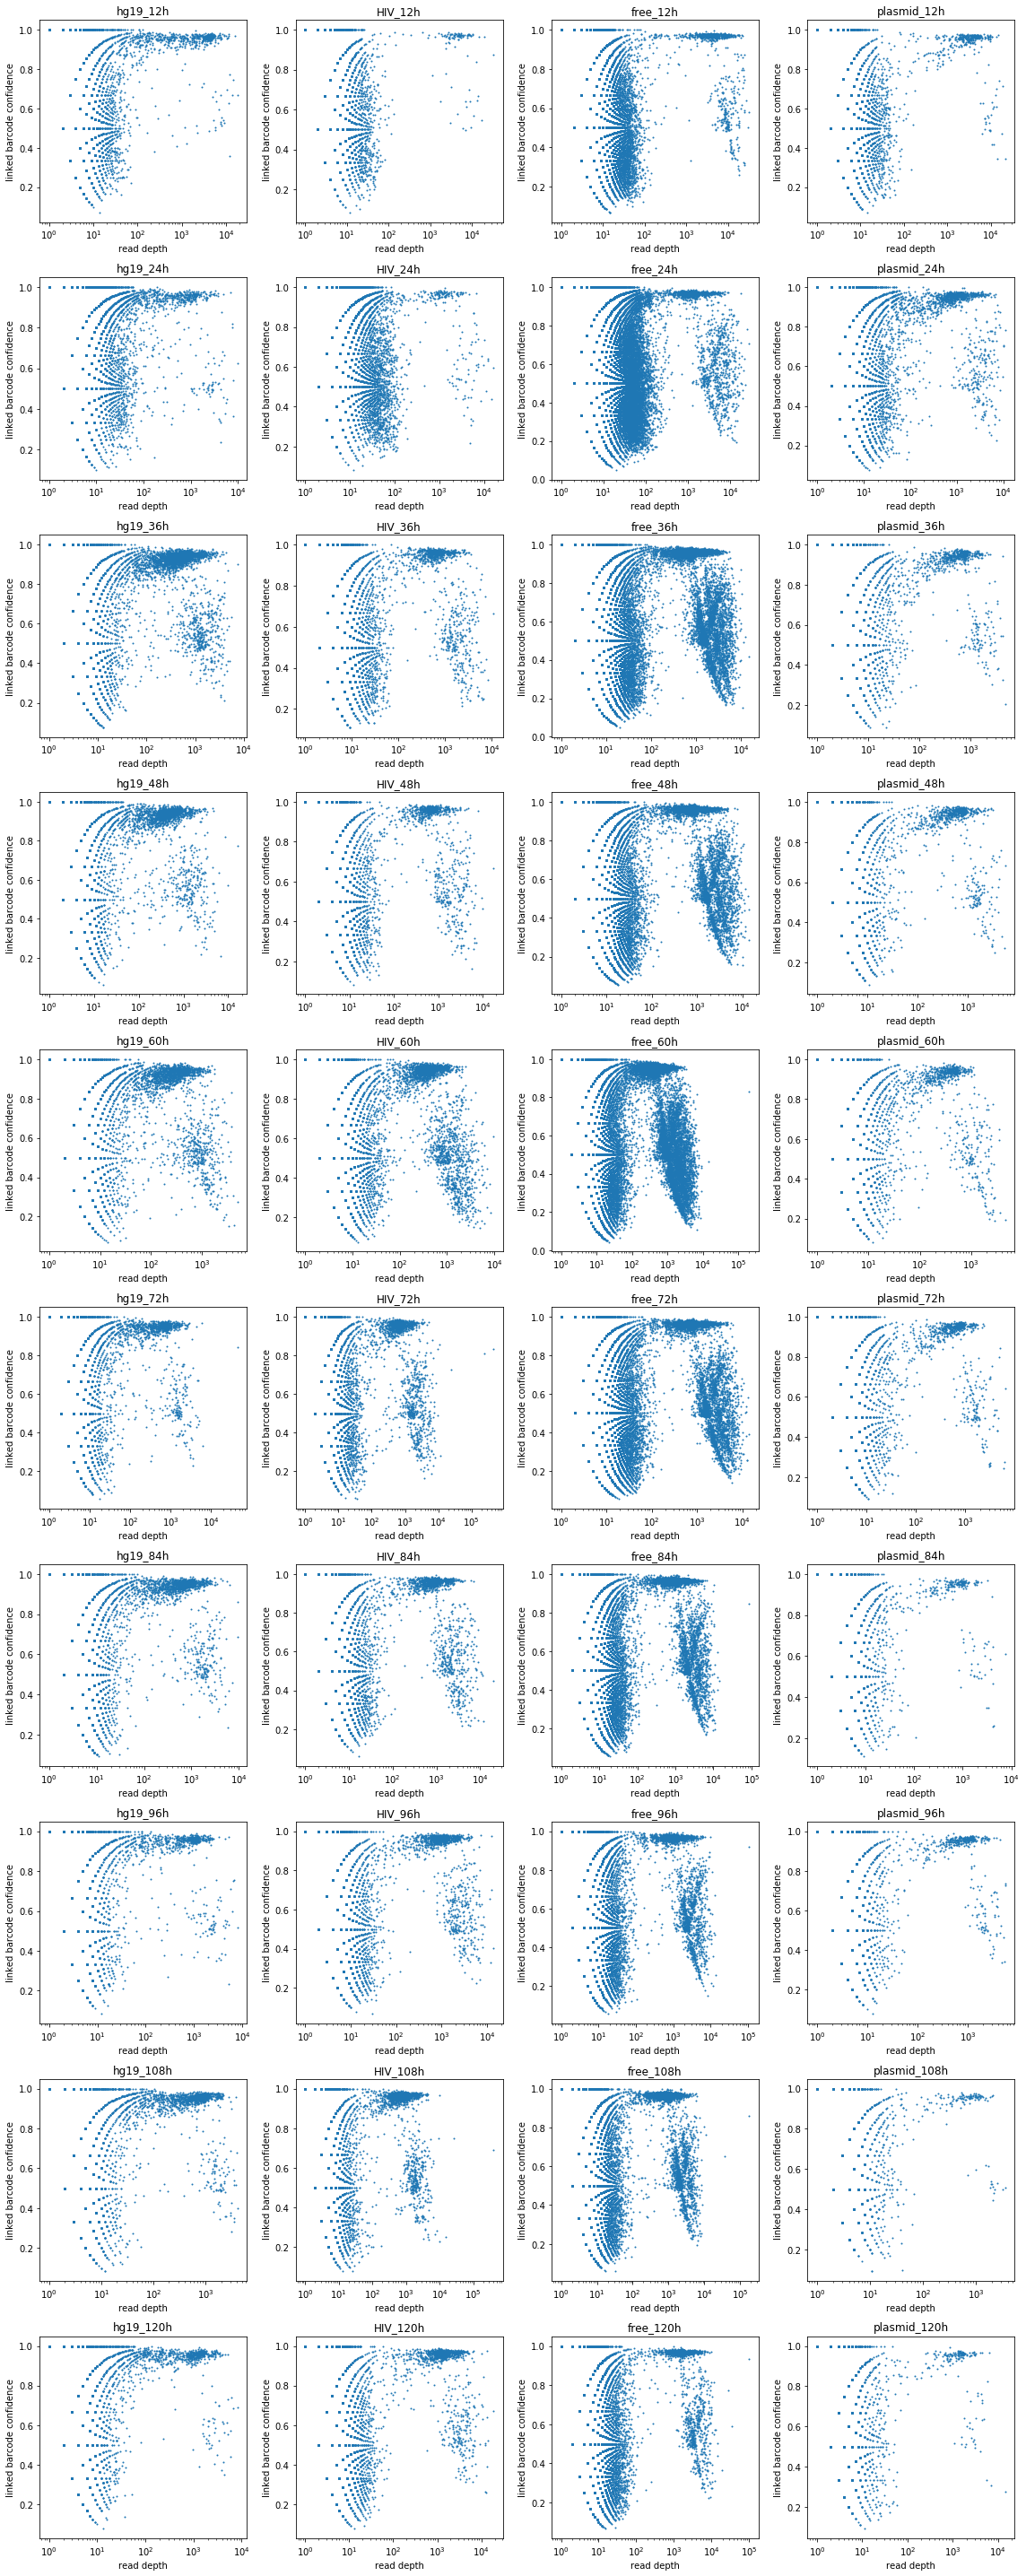

In [39]:
stypelist = ['hg19','HIV','free','plasmid']
plt.figure(figsize=(16,40))
ploti = 0
for time in range(12,132,12):
    for site_type in stypelist:
        ploti += 1
        plt.subplot(10,4,ploti)
        plt.scatter(hdata[(hdata['site_type']==site_type)&(hdata['time']==time)]['UMI_count'],hdata[(hdata['site_type']==site_type)&(hdata['time']==time)]['barcode_freq'],s=1)
        plt.title(site_type+'_'+str(time)+'h')
        plt.xlabel('read depth')
        plt.ylabel('linked barcode confidence')
        plt.xscale('log')
plt.tight_layout()
plt.savefig('linkage_quality.png',dpi=600)

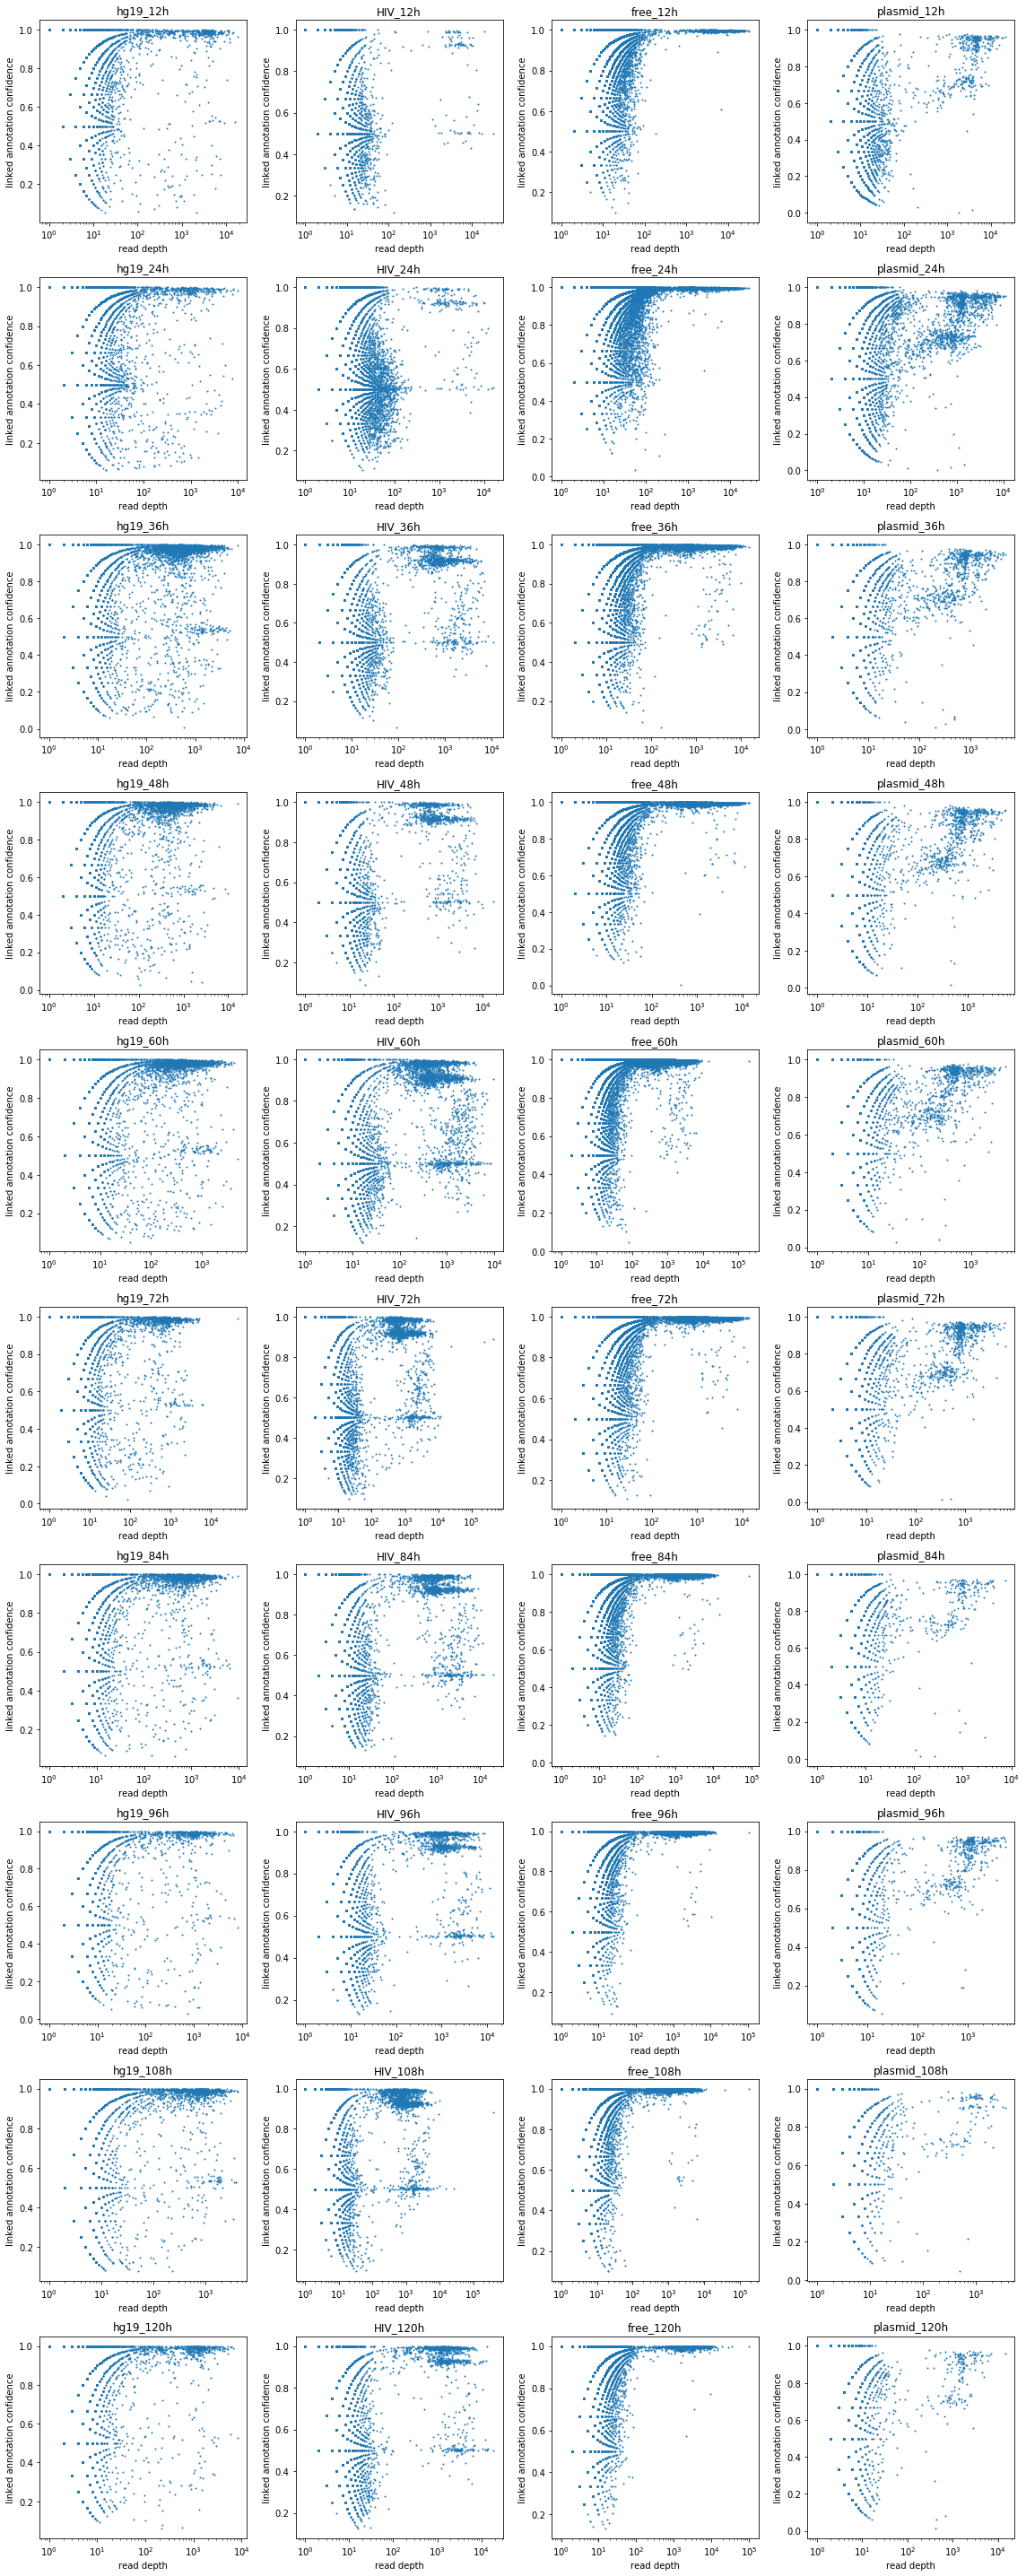

In [40]:
stypelist = ['hg19','HIV','free','plasmid']
plt.figure(figsize=(16,40))
ploti = 0
for time in range(12,132,12):
    for site_type in stypelist:
        ploti += 1
        plt.subplot(10,4,ploti)
        plt.scatter(hdata[(hdata['site_type']==site_type)&(hdata['time']==time)]['UMI_count'],hdata[(hdata['site_type']==site_type)&(hdata['time']==time)]['site_freq'],s=1)
        plt.title(site_type+'_'+str(time)+'h')
        plt.xlabel('read depth')
        plt.ylabel('linked annotation confidence')
        plt.xscale('log')
plt.tight_layout()
plt.savefig('linkage_quality_site.png',dpi=600)

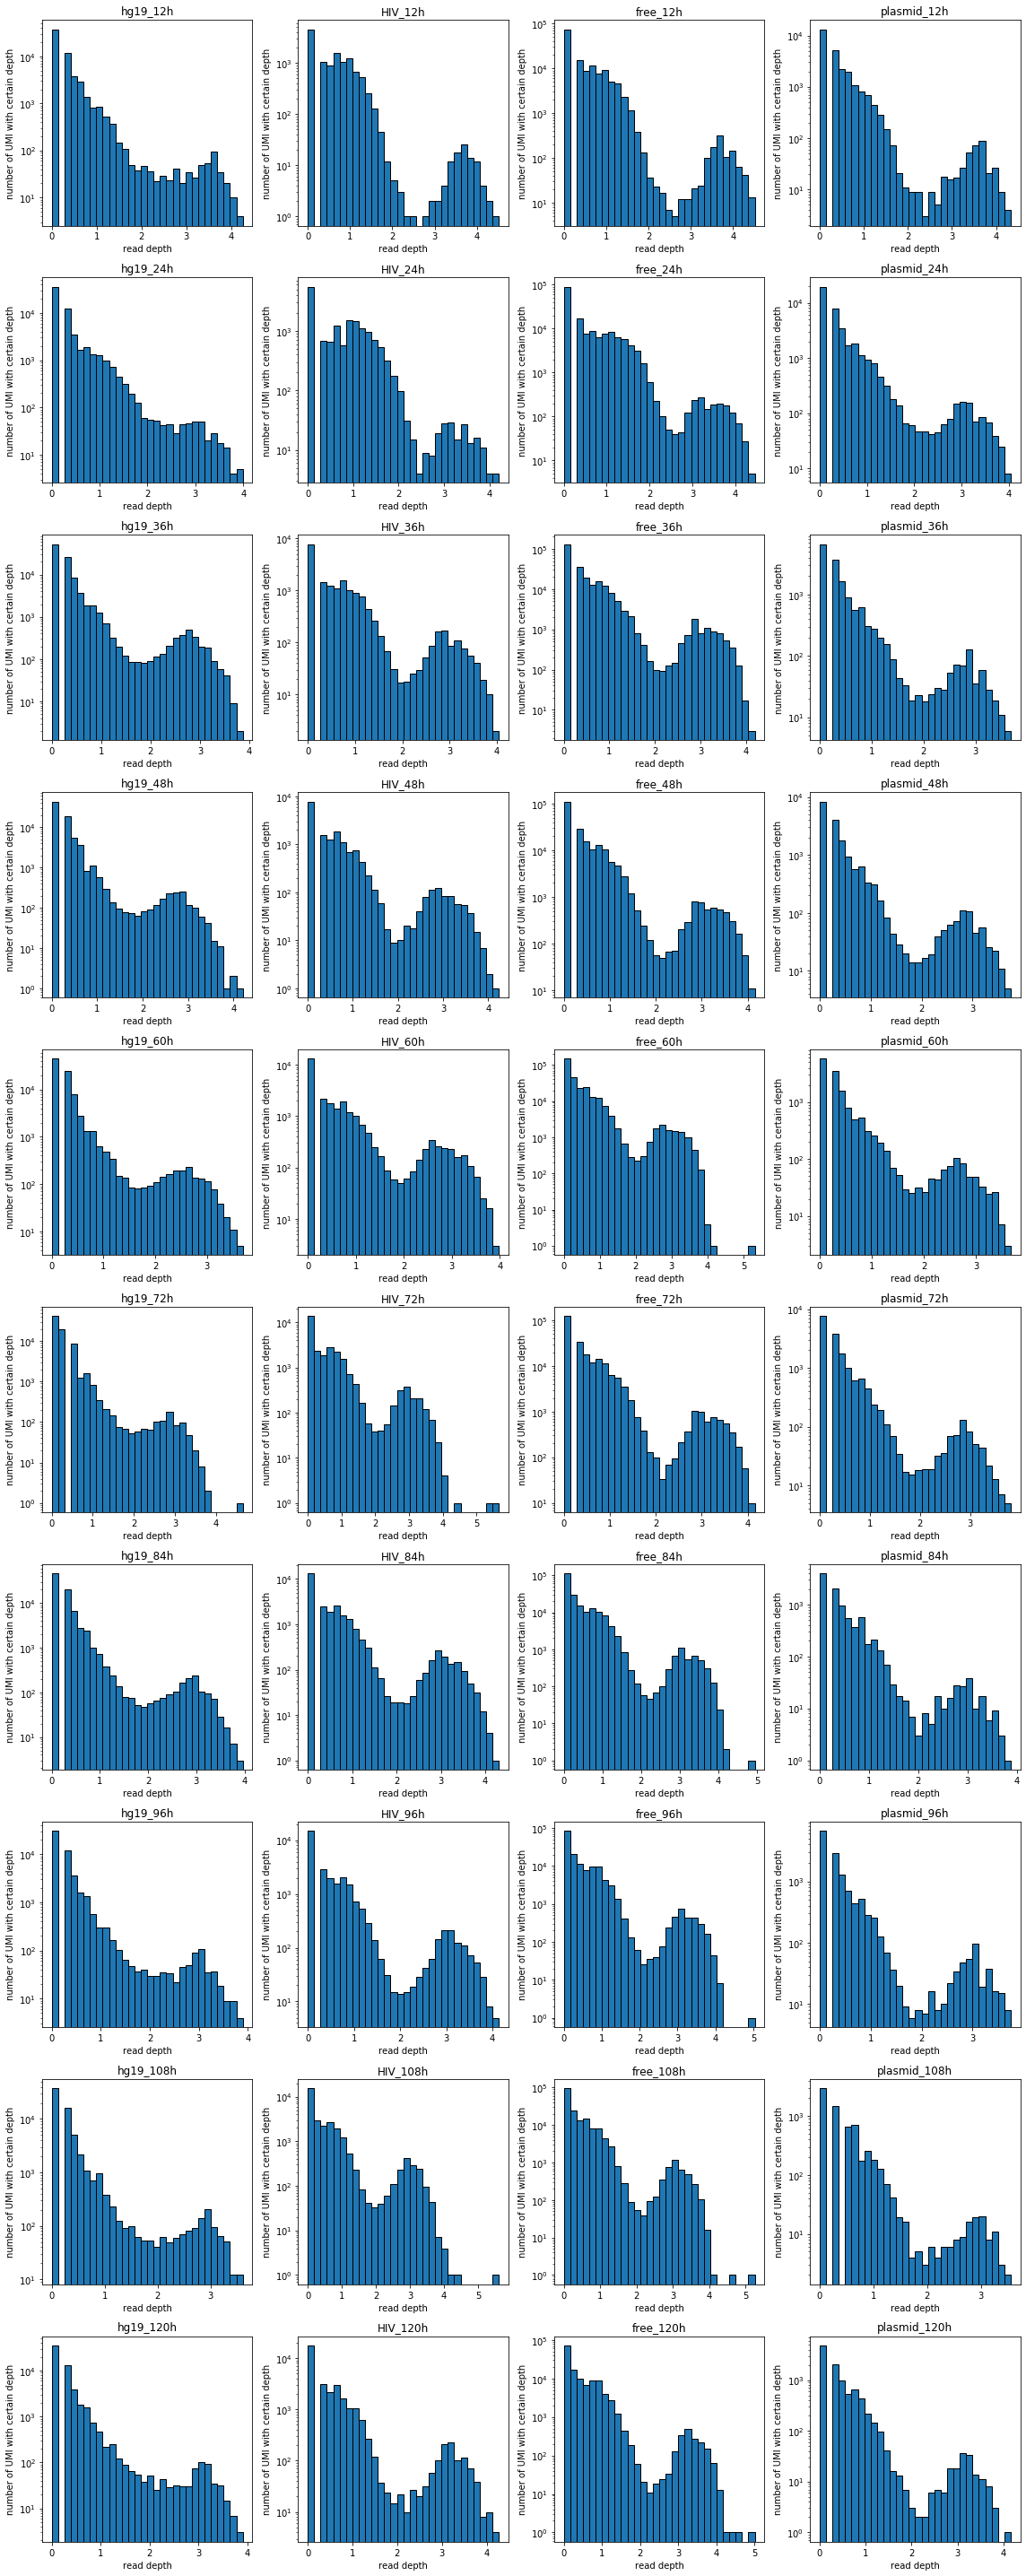

In [41]:
plt.figure(figsize=(16,40))
ploti = 0
for time in range(12,132,12):
    for site_type in stypelist:
        ploti += 1
        plt.subplot(10,4,ploti)
        plt.hist(np.log10(hdata[(hdata['site_type']==site_type)&(hdata['time']==time)]['UMI_count']),bins=30,edgecolor='black')
        plt.yscale('log')
        plt.xlabel('read depth')
        plt.ylabel('number of UMI with certain depth')
        plt.title(site_type+'_'+str(time)+'h')
plt.tight_layout()
plt.savefig('sequencing_depth.png',dpi=600)

In [42]:
hdata[(hdata['site_type']=='hg19')&(hdata['time']==12)]

UMI  UMI_count                      barcode  barcode_freq  \
12 0       GATGACATGG          1  CTTATAGCAGTAGAAGTCGAAGTTGGG           1.0   
   3       TTATTTATTC          1  CTTATAGGAGACGGTGAAGTAGTTGTT           1.0   
   5       ATTAATAGAT          1  CTTATAGAAGACGATGAGGTCGGTGAC           1.0   
   15      ATTAATAGAA          1  CTTATAGGAGTAGAGGAAGGAGAAGCT           1.0   
   19      AATTTCATAA          2  CTTATAGTAGATGGAGGTGTAGGAGAA           0.5   
...               ...        ...                          ...           ...   
   240762  GTGCACCTCG          4  CTTATAGAAGATGACGAGGGAGCGGTG           1.0   
   240764  AGATAGATTC          1  CTTATAGACGGTGTCGTAGATGATGTG           1.0   
   240772  ACACAAGGGA          2  CTTATAGTCGCGGAGGTTGCAGTCGTG           0.5   
   240775  AGTTGCAAAT          1  GTTATAGCCGCTGATGAAGCGGGAGCA           1.0   
   240778  GGTGTGGCGG          1  CTTATAGAGGCTGAAGTTGAGGCTGAT           1.0   

           second_bc_freq site_type         site_annot  site_freq  \
12 0                  NaN      hg19    chr2:33141553:-        1.0   
   3                  NaN      hg19    chr2:33141650:-        1.0   
   5                  NaN      hg19   chr2:223731463:+        1.0   
   15                 NaN      hg19   chr13:79095139:-        1.0   
   19                 0.5      hg19  chr13:109871011:-        0.5   
...                   ...       ...                ...        ...   
   240762             NaN      hg19   chr13:34211658:+        1.0   
   240764             NaN      hg19   chr11:14853972:-        1.0   
   240772             0.5      hg19   chr9:103445025:-        0.5   
   240775             NaN      hg19   chr9:126730549:+        1.0   
   240778             NaN      hg19   chr8:100626481:+        1.0   

           second_site_freq  time  
12 0                    NaN    12  
   3                    NaN    12  
   5                    NaN    12  
   15                   NaN    12  
   19                   0.5    12  
...                     ...   ...  
   240762               NaN    12  
   240764               NaN    12  
   240772               0.5    12  
   240775               NaN    12  
   240778               NaN    12  

[60926 rows x 10 columns]